In [2]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Survey.csv')

In [4]:
df.columns

Index(['Timestamp',
       'Pleaseconfirmyourvoluntaryparticipationandgiveyourconsentfordata',
       'Profession', 'Country', 'Region', 'Place of residence province',
       '@4.HighestLevelofeducation', '@5.Whichsettingdoyouwork', 'sex', 'Age',
       '@8.Maritalstatus',
       '@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional',
       'COVIDNewsUpdates', 'A1.1HaveyouheardaboutCOVID19',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]',
       'WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]',
       'A3.8 Do you or your household members use internet?',
       'A3.9 Please indicate which of the following do you use for COVID-19

In [189]:
#Fixing Sex Column
df.sex.replace({'Transgender 1': 'Transgender','0nbinary':'Binary','1':'Female','2':'Male'},inplace=True)
#Drop 2 Outliers
df = df[df['sex'].isin(['Female','Male'])]
df.sex.value_counts()

Male      1728
Female    1303
Name: sex, dtype: int64

In [152]:
#Fixing Profession
df.Profession.replace({'others':'Others'},inplace=True)
df.Profession.value_counts()

Academian/Administration    1631
Medical Professionals       1349
Others                        56
Name: Profession, dtype: int64

In [153]:
#Fixing Country
df.Country.replace({'Maxico':'Mexico'},inplace=True)
df.Country.value_counts()

China                   712
Mexico                  595
Bangladesh              494
United States           335
Pakistan                285
Malaysia                151
Japan                    87
Zambia                   76
Turkey                   38
Ghana                    36
United kingdom           30
Bosnia & Herzegowina     24
Nepal                    15
Colombia                 12
England                  11
India                    11
Thailand                 11
United Arab Emirates     11
Brazil                   10
Saudi Arabia              9
Norway                    7
Italy                     5
Oman                      4
Morocco                   4
Germany                   4
Australia                 3
Chile                     3
South Africa              3
New Zealand               3
Canada                    3
Hungary                   3
Kazakhstan                2
Myanmar                   2
Kenya                     2
Venezuela                 2
Ireland             

In [14]:
df['Place of residence province'].value_counts()[:20]

Dhaka                 134
So0ra, Hermosillo     114
Rangpur                54
Puebla                 45
Hermosillo, So0ra      38
Rajshahi               33
So0ra                  33
SO0RA, HERMOSILLO      31
Karachi                29
Islamabad              27
Shizuoka é™å²¡çœŒ     26
Kuala Lumpur           26
Puebla, Puebla         24
AydÄ±n                 20
Lusaka                 19
Tokyo æ±äº¬éƒ½        16
Nagasaki é•·å´ŽçœŒ     15
Portland, OR           14
Sylhet                 13
Selangor               12
Name: Place of residence province, dtype: int64

In [154]:
#Fixing Education
df['@4.HighestLevelofeducation'].replace({'Bachelor/undergraduate':'Undergrad','Bachelor\'s degree': 'Undergrad',
                                          'Master/graduate or Ph.D.':'Postgrad','Junior high school or lower':'Primary School',
                                         'High school':'High School','PhD':'Postgrad','Masters':'Postgrad','college':'College',
                                         'master\'s degree':'Postgrad','Bachelor':'Undergrad','Master':'Postgrad',
                                         'Graduate School(Master) å¤§å­¦é™¢å’æ¥­ï¼ˆä¿®å£«ï¼‰':'Postgrad',
                                         'Doctorate':'Postgrad','bachelor':'Undergrad','Bachelor å¤§å­¦å’æ¥­':'Undergrad',
                                          'high school':'High School','HSC':'High School','University':'Undergrad',
                                         'Some college':'College','Master\'s degree':'Postgrad','Tertiary':'Undergrad',
                                         'Bachelors':'Undergrad','High School é«˜ç­‰å­¦æ ¡å’æ¥­':'High School',
                                         'Graduation':'Undergrad','Graduate': 'Undergrad','Undergraduate':'Undergrad',
                                         'High School é«˜ç‰å¦æ ¡å’æ¥':'High School','High school diploma':'High School',
                                         'Bachelor\'s':'Undergrad','Masters Degree':'Postgrad','Bachelor degree':'Undergrad',
                                         'Bsc':'Undergrad','Masters degree':'Postgrad','Ho0urs':'Undergrad',
                                         'Bachelors Degree':'Undergrad','MSc':'Postgrad','Mbbs':'MBBS','Graduate School(Doctor) å¤§å­¦é™¢å’æ¥­ï¼ˆåšå£«ï¼‰':'MBBS',
                                         'MBBS 2nd year':'MBBS','M.B.B.S':'MBBS','Hsc':'High School','MSN':'MBBS','MBBS 1t year':'MBBS'},inplace=True)
#Yet to Finish--------------------------------------------------------------------








df['@4.HighestLevelofeducation'].value_counts()[:10].values

array([675, 418, 283, 201, 193, 114,  56,  16,  15,  11])

In [155]:
df['@5.Whichsettingdoyouwork'].value_counts()

Medical                      495
Community                    377
OPD                          117
Surgcial                      80
External consultation         42
                            ... 
Furloughed                     1
Studying in a college          1
English medium                 1
IPD                            1
Climate change, heat wave      1
Name: @5.Whichsettingdoyouwork, Length: 552, dtype: int64

In [190]:
#Drop Age = 2,1885,1984
df = df[~df['Age'].isin([2,1885,1984])]
#Binning by Age
df['AgeBin'] = pd.qcut(df['Age'],5)
df['AgeBin'].value_counts()

(8.999, 21.0]    698
(30.0, 41.0]     614
(41.0, 76.0]     597
(24.0, 30.0]     594
(21.0, 24.0]     528
Name: AgeBin, dtype: int64

In [157]:
#Fixing Maritial Status
df['@8.Maritalstatus'].replace({'In a realtionship':'1'},inplace=True)
df['@8.Maritalstatus'].value_counts()

1    1709
2    1196
3     126
Name: @8.Maritalstatus, dtype: int64

In [158]:
df['@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional'].unique()

array(['2.8888', '400', nan, '0', '6000', '25000', '10', '1500', '12000',
       '200', '120000', '5000', '100000', '10000', '500', '60000',
       '80000', '220000', '50000', '2900', '4000', '7600', 'My parents',
       '20000', '440', '600', '800', '300000', '70000', '52000', '30000',
       '90000', '200000', '50', '350', '300', '2000', '15000',
       '40,000 mexica0s pesos', '9000', '35000', '1000', '27000',
       '876543', '420', '$ 20 000', '100', '13000000', '8000', '5416',
       '1143', '2500', '7500', '3000', '4000 mexican pesos', '10,000 MXN',
       '400000', '1800', '40000', '2200', '500000', '16000', '2060',
       '45000', '3800', '18000', '380', '4250', '7000', 'parent ssupport',
       '$8500 MNX', 'students', '16', '3500', '4300', '8500', '6250',
       '250000', '600000', '36000', '9200', '13000', '38000', '75000',
       '5000000', '44000', '11000', '1200', '35570', '5000 monthly',
       '4500', '60', '699', '52.5', '1000000', '700',
       'I depend on my parent

In [159]:
df['A1.1HaveyouheardaboutCOVID19'].value_counts()

1    2745
0     286
Name: A1.1HaveyouheardaboutCOVID19, dtype: int64

In [191]:
df['Access_Of_Information'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]']\
+ df['WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]']

In [5]:
df['Access_Of_Information'].value_counts()

5.0    1062
4.0     698
3.0     667
2.0     379
1.0     156
0.0       1
Name: Access_Of_Information, dtype: int64

In [162]:
df.to_csv('Survey.csv',index=False)

In [193]:
from scipy import stats
df = df[df['Country'] == 'Bangladesh']
contingency_table = pd.crosstab(df['AgeBin'],df['Access_Of_Information'])
stat,p,dof,expected = stats.chi2_contingency(contingency_table)
prob = 0.95
#     print(country,dof,df_test['Quarantine'].value_counts())
critical = stats.chi2.ppf(prob,dof)
stat,critical

(22.941311163258348, 31.410432844230918)

<AxesSubplot:xlabel='Access_Of_Information'>

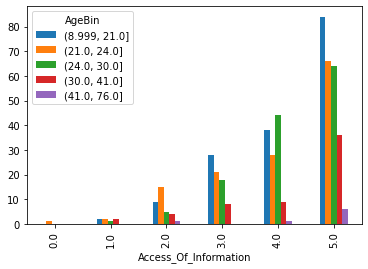

In [194]:
contingency_table.T.plot.bar(stacked=False)

<AxesSubplot:xlabel='AgeBin'>

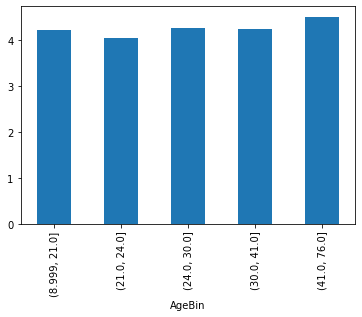

In [195]:
test = df.groupby(['AgeBin'])['Access_Of_Information'].mean()
test.plot.bar()


In [163]:
df.columns

Index(['Timestamp',
       'Pleaseconfirmyourvoluntaryparticipationandgiveyourconsentfordata',
       'Profession', 'Country', 'Region', 'Place of residence province',
       '@4.HighestLevelofeducation', '@5.Whichsettingdoyouwork', 'sex', 'Age',
       '@8.Maritalstatus',
       '@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional',
       'COVIDNewsUpdates', 'A1.1HaveyouheardaboutCOVID19',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]',
       'WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]',
       'A3.8 Do you or your household members use internet?',
       'A3.9 Please indicate which of the following do you use for COVID-19

In [6]:
cleaned = pd.DataFrame()
cleaned['Profession'] = df['Profession']
cleaned['Country'] = df['Country']
cleaned['Region'] = df['Region']
cleaned['Education'] = df['@4.HighestLevelofeducation']
cleaned['Sex'] = df['sex']
cleaned['Age'] = df['Age']
cleaned['AgeBin'] = df['AgeBin']
cleaned['1.1HeardCovid'] = df['A1.1HaveyouheardaboutCOVID19']
cleaned['1.2_Television/Radio'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]']
cleaned['1.2_Newspaper/Magazines'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]']
cleaned['1.2_SocialMedia'] = df['WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia']
cleaned['1.2_Colleagues/Workplace'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]']
cleaned['1.2_Neighbors'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]']
cleaned['Access_Of_Information'] = cleaned['1.1HeardCovid'] + cleaned['1.2_Television/Radio'] \
                                + cleaned['1.2_Newspaper/Magazines'] + cleaned['1.2_SocialMedia'] +\
                                cleaned['1.2_Colleagues/Workplace'] + cleaned['1.2_Neighbors'] 
